
<center><u><H1>Frequency Chart</H1></u></center>

In [2]:
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [3]:
def preprocessing(text):
    words = word_tokenize(text)
    tokens = [w for w in words if w.lower() not in string.punctuation]
    stopw = stopwords.words('english')
    tokens = [token for token in tokens if token not in stopw]
    # remove words less than three letters
    tokens = [word for word in tokens if len(word)>=3]
    #lower capitalization
    tokens = [word.lower() for word in tokens]
    # lemmatize
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text 

In [6]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Sai Charan
[nltk_data]     Reddy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [7]:
text1 = open('../Data/carl_sagan_quote4.txt').read()
text2 = open('../Data/carl_sagan_quote2.txt').read()
list = [text1, text2]
word_list = []
for line in list:
    word_list.append(preprocessing(line))
word_list

["'ve arranged civilization crucial element profoundly depend science technology",
 'also arranged thing almost one understands science technology this prescription disaster might get away sooner later combustible mixture ignorance power going blow face']

In [8]:
vectorizer = TfidfVectorizer()
doc_vector = vectorizer.fit_transform(word_list)

In [9]:
df = pd.DataFrame(doc_vector.toarray().transpose(), index=vectorizer.get_feature_names())
df.columns = ['text1', 'text2']
df

,text1,text2
almost,0.000000,0.215572
also,0.000000,0.215572
arranged,0.259482,0.153381
away,0.000000,0.215572
blow,0.000000,0.215572
civilization,0.364693,0.000000
combustible,0.000000,0.215572
crucial,0.364693,0.000000
depend,0.364693,0.000000
disaster,0.000000,0.215572


In [10]:
freq = df.iloc[:,0].sort_values(ascending=False, inplace=False)

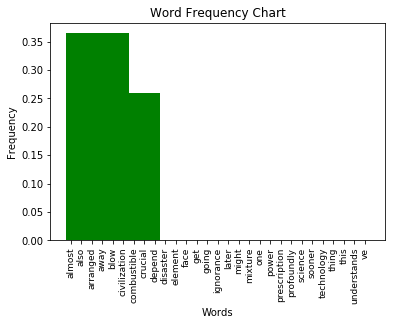

In [11]:
words = df.index
xvalues = np.arange(len(df.index))
width = 1.0
ax = plt.axes(frameon=True)
ax.set_xticks(xvalues)
ax.set_xticklabels(words, rotation='vertical', fontsize=9)
ax.set_title('Word Frequency Chart')
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
plt.bar(xvalues,freq, width,color='g' )
plt.show()

## Reference:

http://www.nltk.org/book/ch02.html